In [16]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Clustering

The file `data/activity.csv` contains data from wearable devices (Fitbit-like)  measured from 62 individuals recorded during a 5 minutes time interval. These inidividuals were engaged in a small subset of activities (i.e., sleeping, running, or walking), but we are not provided any information about these activities not about the individuals who were engaged in the same activities (ex. running)

In this exercise, you will use `k-means` clustering algorithm to cluster the time series data. The objective is to identify the number of activities represented in this dataset, and the clusters of individuals that were involved in the same activities.  

Important: the dataset contains data from two cohorts. Unfortunately, for the first cohort of individuals, the activity was measured each second, while for the second cohort, the activity was measured every 2 seconds. Such inconsistency is very common in real data.

Read the data into a variable called `activities` and display the 15 first lines and the last 15 lines. Observe that for the individuals who were sampled every two seconds, half of the data contain missing values (NaNs).


In [3]:
# Read the data into a variable
activities = pd.read_csv('data/activity.csv')

In [6]:
# Print the first 15 lines of data
print('First 15 lines of Data')
activities.head(15)

First 15 lines of Data


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
1,12.071557,12.065385,11.724136,12.101567,12.139391,12.360870,12.114123,11.818063,11.690854,11.873143,...,18.262320,18.154305,17.523602,17.805053,18.073211,17.999266,18.149337,18.167567,18.040851,18.252954
2,12.183714,12.021565,11.577950,12.209226,12.072627,12.322689,12.307760,11.630762,12.008822,11.825949,...,18.093134,18.152622,17.474589,17.908550,17.753720,18.203611,18.016420,18.433005,17.903249,18.188720
3,12.400325,12.187446,11.571325,12.423728,12.307252,12.466640,12.241498,11.497206,12.123636,11.974786,...,17.946807,18.093075,17.254170,17.780044,17.738934,18.271126,17.698719,18.367698,17.842029,17.992113
4,12.611085,11.745219,11.930236,12.350737,12.381180,12.207986,12.119051,11.555645,12.403555,12.059095,...,17.985591,18.238300,17.282918,18.003957,17.562703,18.190507,17.800618,18.317763,17.725902,17.779425
5,12.335551,11.792342,11.826714,12.182895,12.359720,12.016699,11.902020,11.518179,12.135129,12.112459,...,17.911432,18.616591,17.199353,17.908310,17.618975,18.208032,18.069070,18.285425,17.906178,17.926519
6,12.147986,11.946515,11.871472,11.973934,12.449263,12.111180,11.736938,11.070533,11.861965,12.044634,...,18.357063,18.676709,17.317736,17.966484,17.607053,18.302451,17.936622,18.340404,17.887137,17.932443
7,12.250993,11.650798,11.868187,11.580662,12.135088,12.408003,12.326757,10.646393,11.832171,12.118647,...,18.324557,18.573497,17.313905,17.836376,17.996417,18.330296,17.775959,18.224190,17.627595,18.059186
8,12.353750,11.879549,12.105866,11.991904,11.909735,12.479126,12.575693,10.525020,11.932728,12.093900,...,18.391601,18.535546,16.934705,18.023821,18.179743,18.360433,17.670979,17.645353,17.482907,18.181811
9,12.456760,11.947248,12.611252,11.771262,11.670950,12.416514,12.305478,10.616557,12.292000,12.185461,...,18.580355,19.039488,16.741287,17.892671,18.236645,18.206623,17.785301,17.883907,16.843054,17.777841


In [4]:
# Print the last 15 lines of data
print('Last 15 lines of Data')
activities.tail(15)

Last 15 lines of Data


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
285,13.632367,13.640749,14.623291,14.447148,11.229031,13.701166,14.451349,9.531037,14.231535,9.741154,...,19.859492,16.290565,19.060086,18.135866,NaN,NaN,NaN,NaN,NaN,NaN
286,13.545855,13.735032,14.661142,14.845983,11.535718,13.873083,14.581369,9.487124,14.034374,11.084968,...,19.939409,16.023299,18.850009,18.065544,NaN,NaN,NaN,NaN,NaN,NaN
287,13.624746,13.624588,15.068268,15.655154,11.250927,13.795657,14.730439,10.530685,13.977543,9.074079,...,19.705306,15.432278,18.693957,18.113996,NaN,NaN,NaN,NaN,NaN,NaN
288,13.540549,13.751174,15.092340,14.718916,11.197596,13.786575,15.416667,10.180831,14.216496,9.660678,...,19.911658,15.364228,18.393472,18.130604,NaN,NaN,NaN,NaN,NaN,NaN
289,13.598504,13.791759,14.514193,14.158281,11.111747,13.791653,15.110271,9.999843,14.395425,9.609422,...,20.013794,16.973349,18.380923,18.215027,NaN,NaN,NaN,NaN,NaN,NaN
290,14.013584,13.488610,14.671553,15.482426,11.229458,13.407718,14.743402,10.224737,14.120853,10.799269,...,19.691936,16.171265,18.500946,18.394696,NaN,NaN,NaN,NaN,NaN,NaN
291,14.187809,13.798111,15.268326,14.382826,10.909833,13.404951,14.884738,9.492620,14.191149,10.431112,...,19.684388,17.081737,18.496662,18.655685,NaN,NaN,NaN,NaN,NaN,NaN
292,14.122604,14.157287,15.359477,14.986797,11.002268,13.267005,15.097054,10.208223,13.795504,9.424423,...,19.761579,15.885948,18.389838,18.712782,NaN,NaN,NaN,NaN,NaN,NaN
293,14.362847,14.034729,14.621602,14.595198,11.407129,13.168380,15.241938,9.508848,13.804891,9.595310,...,19.643568,15.909133,18.615129,18.498901,NaN,NaN,NaN,NaN,NaN,NaN
294,14.281232,13.957188,15.750667,14.763080,11.134495,13.457107,15.340680,11.160020,14.184445,10.258473,...,19.347595,15.859156,18.643241,18.445079,NaN,NaN,NaN,NaN,NaN,NaN


We need to resample the data and get rid of the missing values. Imagine we have the following dataset ( `a=[7, 9, 8, 11, 10 , 6], b=[7, 8, 10, nan, nan, nan]`) , where `a` was sampled every second and `b` was sampled every two seconds. Although `a` and `b`  look different, comparing `a` and `b` using the correct time scale shows that they are identical.

<img src="images/a_b.png" width=600/>
<center><b>a</b> and <b>b</b> match when compared on t=1,3,5</center>


Here, the missing values are added to `b` to make it the same length as `a`.

A simple approach to align `a` and `b` is to drop values at every even position in `a` and remove missing values from `b`.  


Dropping values at even positions in `a `will yield `a = [1,3,5]`. Removing missing values will result in `b` becoming `[1,3,5]`. The values are now aligned and can be compared.


Implement the strategy above to align all your data. Use any approach from Pandas to allows you to accomplish this, even if it's something we haven't covered in class.

In [9]:
# Drop values at specific regions
a = activities.iloc[:, np.r_[10:18, 34:40, 56:62]]
b = activities.iloc[:, np.r_[0:10, 18:34, 40:56]]
# Remove the missing values
val_a = b.iloc[::2, :]
val_b = val_a.dropna()
dataset = a.reset_index(drop=True)
final_df = pd.concat([dataset, val_b], axis=1, ignore_index=True)
# Print the final data frame to check whether the values agree. 
final_df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.000000,0.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
1,11.979131,11.398474,12.064637,11.909273,12.003037,12.057355,12.078527,12.205379,0.101753,0.470533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.057793,11.512709,12.321400,12.254518,11.808075,12.027914,12.169244,12.325294,-0.884755,0.608083,...,17.763611,18.501380,18.277977,17.759483,17.769792,18.433222,18.093134,18.152622,17.474589,17.908550
3,11.910181,11.561441,12.580398,12.077052,11.937193,12.140882,11.852799,12.649052,-0.606370,-0.000757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.946432,11.343399,12.689242,12.231411,11.941069,12.468042,11.862845,12.732217,0.021132,0.241356,...,17.009796,18.667504,17.986875,17.549259,18.191688,18.619982,17.985591,18.238300,17.282918,18.003957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.334849,21.395502,19.974861,21.330876,19.280167,21.963835,19.845535,15.678376,18.942684,18.583586
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.416177,21.327357,19.933064,21.547285,19.229356,21.549217,20.081987,15.204785,19.330079,19.111129


The `NaN` values here can be ignored, since the data that we are concerned with should only go up to 140. The following values can be ignored in the graph. 

<AxesSubplot:>

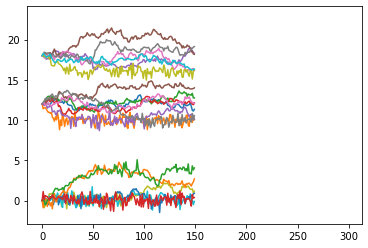

In [13]:
# Plot the Silhoutte index as function of k
final_df.plot(legend=False)

* Compute the Silhoutte index with other values of $k$ (ex. $k \in [3, 5, ..., 10]$ ) to find the most optimal number of cluster for partitioning the data. You can use the Silhouette index implemented in `Scikit-Learn`

Plot you Silhoutte index as a value of $k$. 



* Use the `k-means` algorithm as implemented in the `scikit-learn`  to cluster activities data into the $k$ groups they belong to.


In [15]:
'''
External Reference:
https://scikit-learn.org/stable/modules/clustering.html#k-means
26_clustering.ipynb notebook provided by Professor Mahdi to outline K-Means Steps
'''
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance

# Calculate the range of the clusters
cluster_range = [2,3,4,5,6]

# Initialize clusters by k points; one per cluster by iterating through the clusters range
for i in cluster_range:
    k_means = KMeans(n_clusters=i).fit(final_df)
    # Assign the labels
    # Assign the values to the silhouette score
    # Append these to the values

# Assign points to clusters

# Once all points are assigned, recompute the centroids of the k clusters

# Print the values

Plot the time series using $k$ different colors, each representing one of the $k$ clusters. Your plot should look like the following althought the number of clusters (lines with different clusters) may be different.

 * For simplicity, this sample plot contains only a small subset of the data. You graph should contain all the data. 
 
<img src="images/activities.png" alt="drawing" style="width:800px;"/>


In [ ]:
# Assign colors to each cluster
cluster_colors = ['b', 'g', 'p']
# Plot the graph

* Compute the average movement value for each cluster. 

In [ ]:
# Calculate the average by dividing the total sum of the score of the K-Means by the length of the score
average_movement = sum(k_means_score)/len(k_means_scre)
# Print the average movement value for each cluster
print('The average movement value for the cluster is: ', average_movement)

* Briefly describe how you could have used Gaussian Mixture models to cluster your data.


One of the ways that we can use the Gaussian Mixture model to cluster data is to determine which data point can be assigned to the cluster. This will allow us to calculate the probability of the data point belonging to a specific cluster. To cluster this data, one of the ways that we could do this is dependent on the K-Means algorithm. It is possible to split the data up into two separate clusters, with one cluster being the group that belonged to 1 second, and the other cluster being the group that belonged to the 2 second interval. This data can then be sorted by removing the even time intervals and bringing the data together in order to remove data that is otherwise non-overlapping. This would provide a dataset that can be used to cluster the data by using the `gmm.predict(X)` where `X` is the data to be predicted. This will provide the Gaussian mixture model that accounts for the variance in the data. 